# 📊Research:<br>Airline ticket sales during festivals

### Project Description
There are files that contain query results:
- `/ datasets / query_1.csv` - the result of the first query. It contains information about aircraft models, the number of flights for each model aircraft model in September 2018.
- `/ datasets / query_3.csv` - the result of the third query. It contains information about the cities of flights, the average number of flights arriving in the city city per day in September 2018.

**It is necessary to study the data:**
* Choose the top 10 cities by the number of flights;
* Build schedules: aircraft models and the number of flights, cities and the number of flights, top 10 cities and the number of flights;
* Draw conclusions on each of the graphs, explain the result.

### Description of the sequence of actions <a class="anchor" id="contents"></a>
- [Step 1. Preprocessing for two datasets](#first-bullet) <br>
    - [1.1. Import Files](#first1-1-bullet) <br>
    - [1.2. Learning Data](#first1-2-bullet) <br>
    - [1.3. Top 10 Cities by Number of Flights](#first1-3-bullet) <br>
    - [1.4. Charts:](#first1-4-bullet) <br>
        - [1.4.1 Airplane Models and Number of Flights](#first1-4-1bullet) <br>
        - [1.4.2 Cities and number of flights](#first1-4-2bullet) <br>
        - [1.4.3 Top 10 cities and the number of flights](#first1-4-3bullet) <br>
<br>
- [Step 2. Hypothesis Testing](#second-bullet) <br>
    - [2.1. Hypothesis 1. Demand for tickets during festivals does not differ from demand in normal times](#second2-1-bullet) <br>
<br>
- [Step 3. General conclusion](#third-bullet) <br>

# Step 1. Preprocessing for two datasets <a class="anchor" id="first-bullet"></a>
[back to table of contents](#contents)

## 1.1. Import Files <a class="anchor" id="first1-1-bullet"></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [7]:
data_query_1 = pd.read_csv('query_1.csv')
data_query_3 = pd.read_csv('query_3.csv')
data_query_last = pd.read_csv('query_last.csv')

## 1.2. Learning Data <a class="anchor" id="first1-2-bullet"></a>

In [8]:
data_query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
Unnamed: 0        8 non-null int64
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [21]:
del data_query_1['Unnamed: 0']

In [9]:
data_query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
Unnamed: 0         101 non-null int64
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


In [22]:
del data_query_3['Unnamed: 0']

In [10]:
data_query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
Unnamed: 0       10 non-null int64
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 528.0+ bytes


In [23]:
del data_query_last['Unnamed: 0']

In [24]:
data_query_1.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [25]:
data_query_3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [26]:
data_query_1.isna().sum()

model             0
flights_amount    0
dtype: int64

In [27]:
data_query_1.duplicated().sum()

0

In [28]:
data_query_3.isna().sum()

city               0
average_flights    0
dtype: int64

In [29]:
data_query_3.duplicated().sum()

0

The table **data_query_1** 2 columns, 8 rows. <br>
The table **data_query_3** 2 columns, 101 rows. <br>
In two columns of the table, the object data type:
- in the table `data_query_1` in the column` model` **object**
- in the table `data_query_3` in the column` city` **object**

All table columns presented do not have missing values. <br>
Since the type **object** this is **str** - I think nothing needs to be changed.

## 1.3. Top 10 Cities by Number of Flights <a class="anchor" id="first1-3-bullet"></a>

In [30]:
data_query_3.sort_values(by='average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


## 1.4. Charts: <a class="anchor" id="first1-5-bullet"></a>
### 1.4.1 Airplane Models and Number of Flights <a class="anchor" id="first1-5-1bullet"></a>

Text(0, 0.5, 'Aircraft Models')

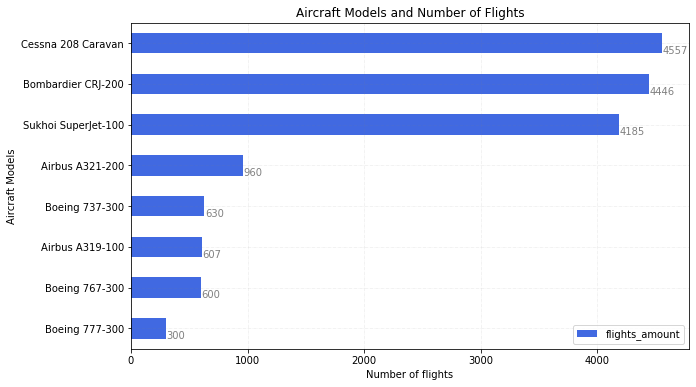

In [31]:
df = data_query_1.sort_values(by='flights_amount', ascending=False).head(10)
ax = df.plot.barh(x = 'model', figsize=(10,6), color="royalblue")

ax.invert_yaxis()
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='light', color='grey')
    
plt.title('Aircraft Models and Number of Flights')
plt.xlabel('Number of flights')
plt.ylabel('Aircraft Models')

### 1.4.2 Cities and number of flights <a class="anchor" id="first1-5-2bullet"></a>

Text(0, 0.5, 'Cities')

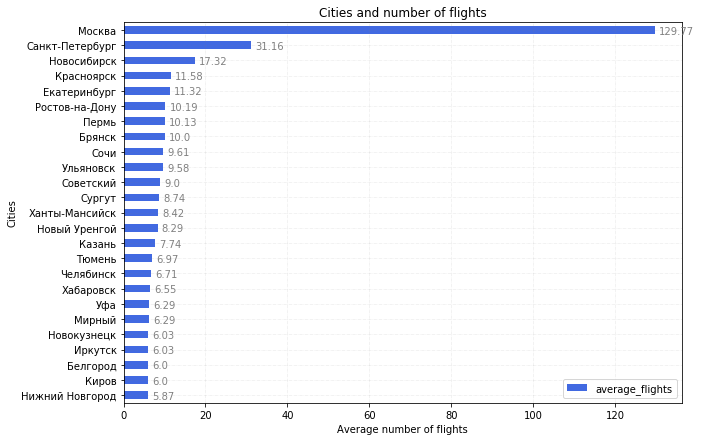

In [32]:
df = data_query_3.sort_values(by='average_flights', ascending=False).head(25)
ax = df.plot.barh(x = 'city', figsize=(10, 7), color="royalblue")

ax.invert_yaxis()
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='light', color='grey')
    
plt.title('Cities and number of flights')
plt.xlabel('Average number of flights')
plt.ylabel('Cities')

Due to the fact that the number of cities is large - yes, the visualization on the graph will still be a canvas, for a more specific comparison we need comparisons of cities by the average number of flights.

### 1.4.3 Top 10 cities and the number of flights <a class="anchor" id="first1-5-3bullet"></a>

Text(0, 0.5, 'Топ-10 городов и количество рейсов')

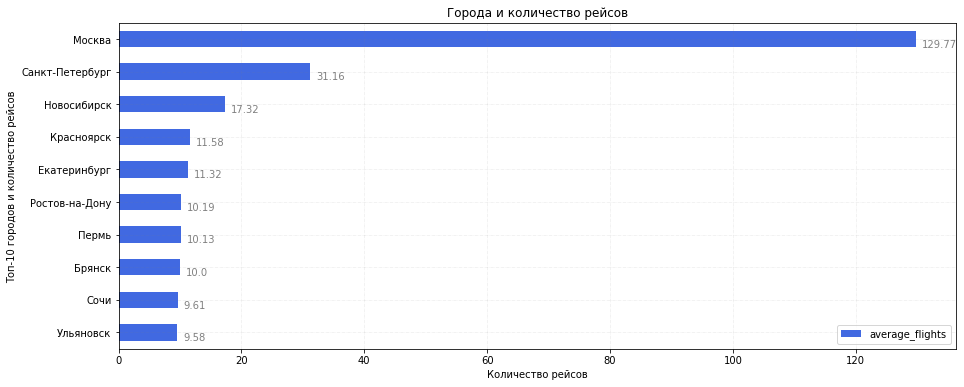

In [17]:
df = data_query_3.sort_values(by='average_flights', ascending=False).head(10)
ax = df.plot.barh(x = 'city', figsize=(15,6), color="royalblue")

ax.invert_yaxis()
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='light', color='grey')
    
plt.title('Города и количество рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Топ-10 городов и количество рейсов')

# Step 2. Hypothesis Testing <a class="anchor" id="second-bullet"></a>
[back to table of contents](#contents)

## 2.1. Hypothesis 1. <br>Demand for tickets during festivals does not differ from demand in normal times <a class="anchor" id="second2-1-bullet"></a>

Tasks:
- Test the hypothesis: “The average demand for tickets during festivals does not differ from the average demand for tickets at normal times”;
- Set alpha threshold value yourself;
- Explain how you formulated the null and alternative hypotheses;
- Explain what criteria were used to test hypotheses and why.

Data:
- `/ datasets / query_last.csv` - the result of the last query. It contains the following information:
- **week_number** - week number;
- **ticket_amount** - the number of tickets sold per week;
- **festival_week** - is there a festival this week;
- **festival_name** - the name of the festival.

Since our hypotheses suggest the possibility of a deviation of the average demand for tickets from the expected one in both directions, the hypothesis is two-sided. You need to consider the general result of the last query - `/ datasets / query_last.csv`. <br>

I use Student's t-test, because the two compared samples are independent of each other. <br>
The threshold alpha value (critical level of statistical significance) is set to standard - equal to 5%. <br>

Hypotheses: <br>
Hypothesis H₀: <br>
**The average demand for tickets during festivals does not differ from the average demand for tickets during normal times** <br>

Alternative Hypothesis H₁: <br>
**The average demand for tickets during festivals differs from the average demand for tickets during normal times**

In [33]:
data_query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [34]:
data_query_last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [35]:
alpha = 0.05
festivals = data_query_last.query('festival_week.notnull()', engine='python')['ticket_amount']
non_festivals = data_query_last.query('festival_week.isnull()', engine='python')['ticket_amount']

results = st.ttest_ind(festivals, non_festivals, equal_var=False)
print('p-мфдгу:', results.pvalue)

if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-мфдгу: 0.377432493172683
Failed to reject the null hypothesis


In [36]:
print("Got a p-value equal to {:.0%}.".format(results.pvalue))

Got a p-value equal to 38%.


The average demand for tickets during festivals and at regular times is not the same. But given the value of `p-value`, we can say that such a difference in average demand, with a probability of 38%, can be obtained by chance.

**Accept Alternative H₁ Hypothesis: <br>
The average demand for tickets during festivals differs from the average demand for tickets during normal times.**

# Step 3. General conclusion <a class="anchor" id="third-bullet"></a>
[back to table of contents](#contents)

Based on an analysis of the demand for tickets, the following conclusions can be drawn:
- Including 10 cities by the number of flights:
    - Of course, there are cities with population over one million people and cities of federal significance (customs, tourism, etc.): Moscow, St. Petersburg, Novosibirsk, Krasnoyarsk, Yekaterinburg, Rostov-on-Don, Perm, Bryansk, Sochi, Ulyanovsk.

- Aircraft models and number of flights:
    - The most popular was the model of the ** Cessna 208 Caravan** aircraft; in total, these models completed **4,557**.
    - In second place is the model **Doombardier SKO-200** - **4446 flights**.
    - In third place is the model **Sukhoi Superjet-100** - **4,185 flights**.
    
The hypothesis that:
**Demand for tickets during festivals does not differ from demand at regular times** - not confirmed. This is logical, since any events increase the number of flights => tickets => and, in general, people.

**Recommendations:**
- Organize events not only in cities with over one million people and embrace new territorial markets.
<br>
<br>
<br>
***